In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

In [3]:
df=pd.read_csv("irrigation_machine.csv")

In [4]:
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [5]:
df.tail()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0
1999,1999,0.0,1.0,4.0,1.0,2.0,2.0,6.0,8.0,5.0,...,2.0,1.0,1.0,0.0,5.0,2.0,1.0,1,1,1


In [6]:
df.sample()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1212,1212,1.0,1.0,2.0,2.0,1.0,1.0,2.0,8.0,2.0,...,2.0,7.0,2.0,0.0,1.0,3.0,1.0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [8]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [9]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [10]:
df.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [11]:
X=df.iloc[:,0:20]
y=df.iloc[:,20:]

In [12]:
X.sample(15)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1263,1.0,1.0,4.0,6.0,1.0,2.0,1.0,3.0,2.0,0.0,1.0,3.0,5.0,4.0,3.0,3.0,1.0,1.0,4.0,0.0
67,0.0,2.0,2.0,3.0,0.0,0.0,6.0,4.0,1.0,1.0,1.0,7.0,5.0,6.0,1.0,1.0,2.0,1.0,3.0,3.0
1807,0.0,2.0,2.0,3.0,8.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,9.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0
874,1.0,1.0,3.0,2.0,2.0,1.0,2.0,6.0,1.0,4.0,2.0,6.0,1.0,2.0,4.0,0.0,2.0,2.0,1.0,2.0
1739,6.0,5.0,3.0,4.0,1.0,3.0,0.0,2.0,2.0,7.0,4.0,1.0,3.0,5.0,2.0,4.0,1.0,2.0,4.0,3.0
1762,0.0,1.0,1.0,5.0,4.0,2.0,3.0,1.0,1.0,1.0,5.0,2.0,3.0,3.0,3.0,0.0,0.0,0.0,5.0,3.0
1705,1.0,0.0,2.0,0.0,1.0,2.0,4.0,4.0,1.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,0.0,2.0,3.0,3.0
605,1.0,3.0,6.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,1.0,6.0,5.0,4.0,1.0,2.0,6.0,2.0,2.0,0.0
1279,1.0,1.0,2.0,1.0,4.0,0.0,6.0,1.0,1.0,0.0,5.0,2.0,2.0,3.0,5.0,1.0,0.0,3.0,3.0,1.0
1555,0.0,1.0,3.0,5.0,1.0,5.0,2.0,4.0,2.0,5.0,1.0,5.0,1.0,1.0,2.0,6.0,2.0,2.0,6.0,5.0


In [13]:
y.sample(15)

,parcel_0,parcel_1,parcel_2
1095,0,0,0
1227,1,1,0
559,1,1,0
979,1,1,0
1236,1,1,1
1744,1,1,1
854,1,1,0
1868,0,1,0
10,1,1,0
513,0,1,0


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [16]:
X.shape,y.shape

((2000, 20), (2000, 3))

In [17]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42) 

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [22]:
rf=RandomForestClassifier(
    n_estimators=250,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42 
)
model=MultiOutputClassifier(rf)
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=250,
                                                       random_state=42))

In [23]:
y_pred=model.predict(X_test)
print("Classification report:")
print(classification_report(y_test,y_pred,target_names=y.columns))

Classification report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.94      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.49      0.65        87

   micro avg       0.90      0.89      0.90       647
   macro avg       0.91      0.80      0.83       647
weighted avg       0.90      0.89      0.89       647
 samples avg       0.82      0.79      0.79       647



C:\Users\saiku\OneDrive\Desktop\ML Course\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saiku\OneDrive\Desktop\ML Course\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saiku\OneDrive\Desktop\ML Course\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control 

In [24]:
print(df[['parcel_0','parcel_1','parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


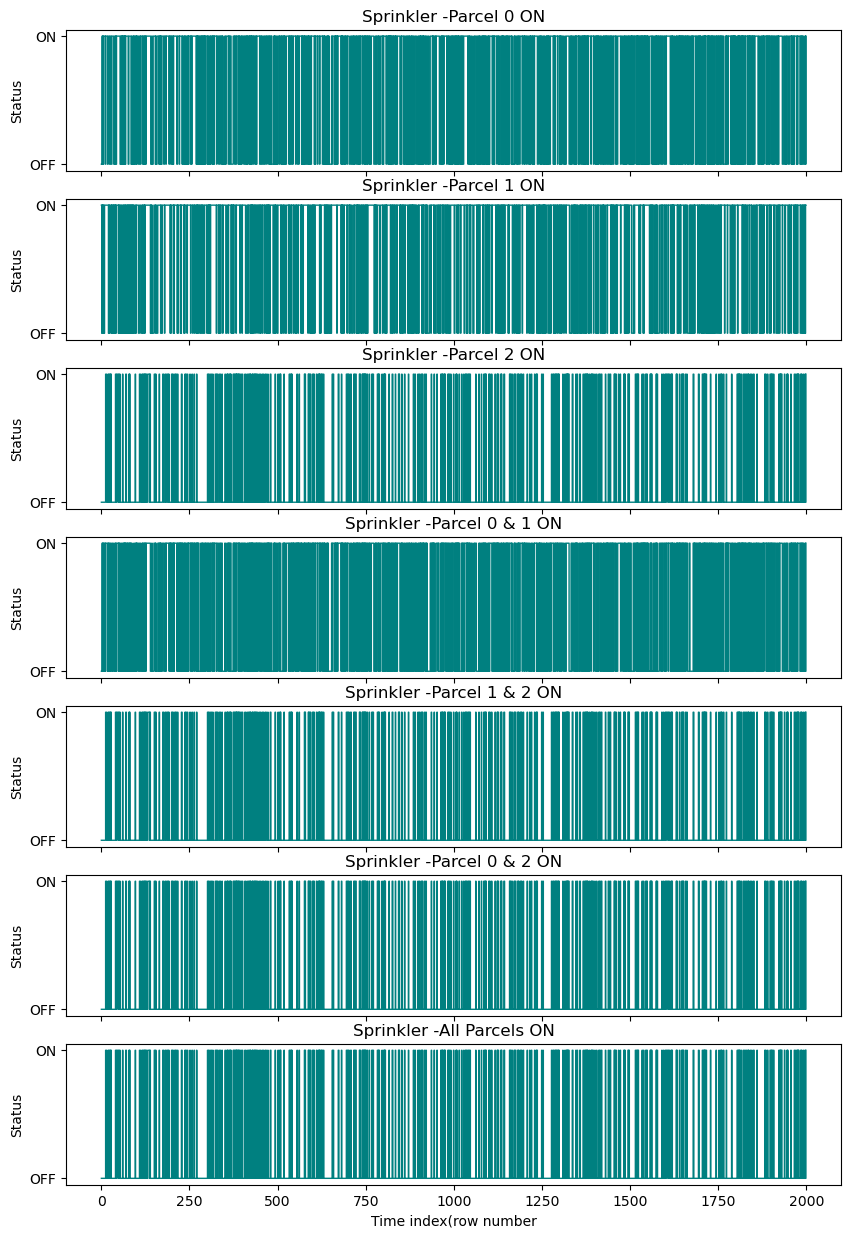

In [28]:
conditions = {
    "Parcel 0 ON":df['parcel_0'],
    "Parcel 1 ON":df['parcel_1'],
    "Parcel 2 ON":df['parcel_2'],
    "Parcel 0 & 1 ON":df['parcel_0'] & df['parcel_1'],
    "Parcel 1 & 2 ON":df['parcel_1'] & df['parcel_2'],
    "Parcel 0 & 2 ON":df['parcel_0'] & df['parcel_2'],
    "All Parcels ON":df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}
fig,axs=plt.subplots(nrows=len(conditions),figsize=(10,15),sharex=True)
for ax,(title,condition) in zip(axs,conditions.items()):
    ax.step(df.index,condition.astype(int),where='post',linewidth=1,color='teal')
    ax.set_title(f"Sprinkler -{title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0,1])
    ax.set_yticklabels(['OFF','ON'])
axs[-1].set_xlabel("Time index(row number")
plt.show()

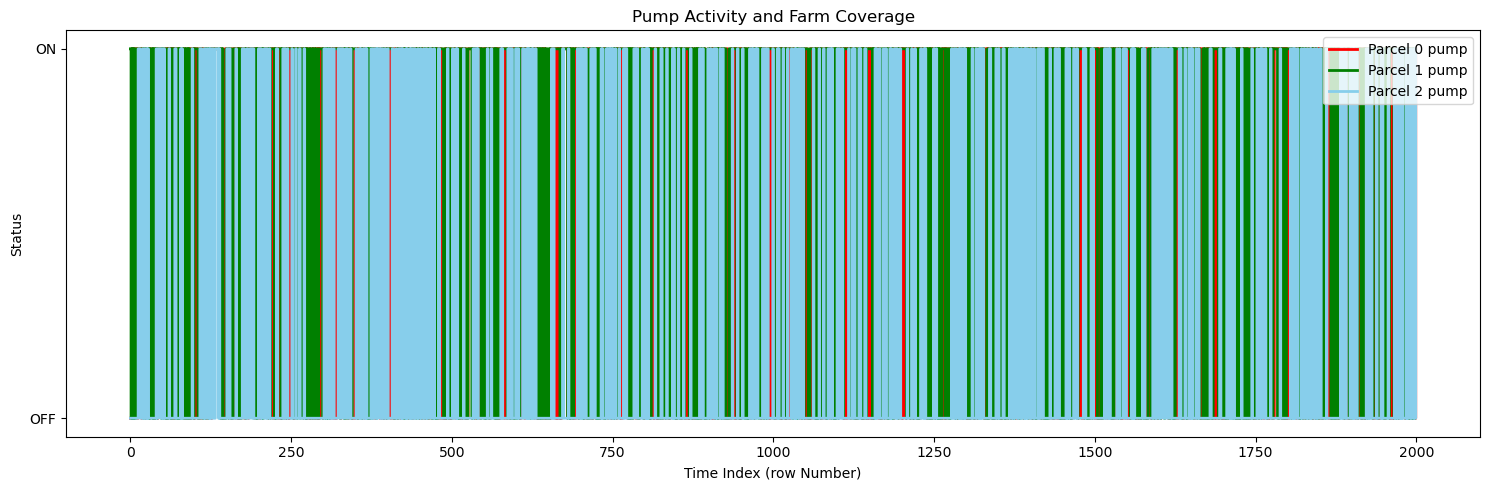

In [34]:
any_pump = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 pump', color='red')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 pump', color='green')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 pump', color='skyblue')

plt.title("Pump Activity and Farm Coverage")
plt.xlabel("Time Index (row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [35]:
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(model,"FARM_IRRIGATION_SYSTEM.pkl")

['FARM_IRRIGATION_SYSTEM.pkl']